In [1]:
import pandas as pd
import numpy as np
import graphviz

from sklearn import tree
from sklearn.model_selection import *
from sklearn.metrics import roc_auc_score

In [2]:
%run functions.ipynb
configurate_display()

# Data reading

In [3]:
df = read_file_csv(get_model_dataset_path())
df.shape

(36025, 437)

# Decision tree train

In [4]:
X, y = df.loc[:, ~df.columns.isin([get_model_target(), get_model_index()] + get_categorical_features())], df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf_dt = tree.DecisionTreeClassifier(max_leaf_nodes=70)
clf_dt = clf_dt.fit(X_train, y_train)
y_pred = clf_dt.predict_proba(X_test)
print('Min roc reachable:' + str(roc_auc_score(y_test, y_pred[:, 1])))

Min roc reachable:0.6674944913730808


If you can not see the graph, check the file: decision_tree_graph_1


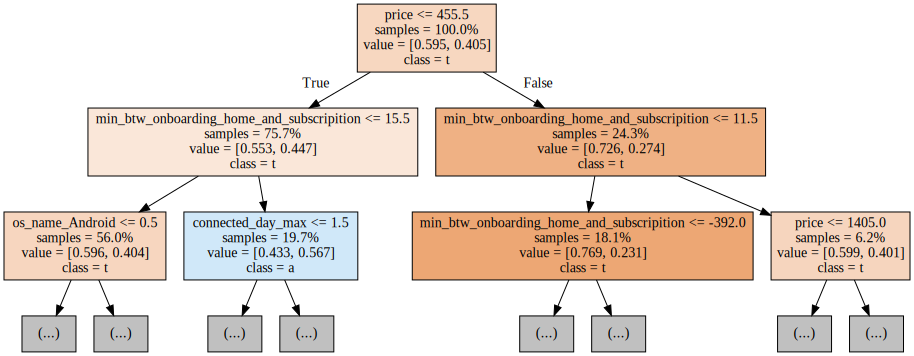

In [5]:
file_output_name = 'decision_tree_graph_1'
print('If you can not see the graph, check the file: ' + file_output_name)
print_tree_graph(file_output_name)
#value=[0,1]

In [6]:
#Insight price
'''
Price amount diferencies are related with the inflation of the currencies, because all users paid around 15usd. 
The model insight means that 72,6% (18% of total) of the users that would paid with the following currencies don't adopt. 
So currencies with high inflation could recieve an incentivation.
'''

(df[df.price <= 455.5])['currency'].unique()

array(['USD', 'GBP', 'EUR', 'MXN', 'HKD', 'RON', 'CAD', 'BOB', 'CNY',
       'PLN', 'AUD', 'BRL', 'TRY', 'SEK', 'MYR', 'ZAR', 'SGD', 'NOK',
       'ILS', 'DKK', 'SAR', 'GHS', 'EGP', 'NZD', 'AED', 'PEN', 'QAR',
       'CHF', 'CZK', 'BGN', 'HRK', 'JOD', 'MAD', 'GEL'], dtype=object)

In [7]:
#Insight OS
'''The 8% of users that not adopt because of using OS Android. It could be related with fails between SO and app.'''

'The 8% of users that not adopt because of using OS Android. It could be related with fails between SO and app.'

In [8]:
#Insight delay suscription
'''
The model indicates that if an user takes less than 15 minutes between onboarding and subcription, the porcentage of not 
adoption is 47% of total. 

That has no business intuition, so I will analyze if filling nan with -999 is introducing noise.

As I can calculate, referring to delay subscription, a nan user is more similar to 90 quantile users than a 10 quantile 
users. So I will fill nan values with large positive number and I will check the impact.
''' 

df_without_nan = df[df.min_btw_onboarding_home_and_subscripition >= 0]
quantile_10 = df_without_nan.min_btw_onboarding_home_and_subscripition.quantile(0.1)
target_quantile10_avg = df_without_nan[df_without_nan.min_btw_onboarding_home_and_subscripition < quantile_10].target.mean()
print('quantile 10 target avg: ' + str(target_quantile10_avg))

quantile_90 = df_without_nan.min_btw_onboarding_home_and_subscripition.quantile(0.9)
target_quantile90_avg = (df_without_nan[df_without_nan.min_btw_onboarding_home_and_subscripition > quantile_90]).target.mean()
print('quantile 90 target avg: ' + str(target_quantile90_avg))

qty_nan = (df[df.min_btw_onboarding_home_and_subscripition == -999]).target.count()
print('qty nan: ' + str(qty_nan))
target_nan_avg = (df[df.min_btw_onboarding_home_and_subscripition == -999]).target.mean()
print('nan target avg: ' + str(target_nan_avg))

print('max value: ' + str(df.min_btw_onboarding_home_and_subscripition.max()))

quantile 10 target avg: 0.2851063829787234
quantile 90 target avg: 0.5600468658465143
qty nan: 1662
nan target avg: 0.5457280385078219
max value: 516952.0


In [9]:
df.loc[df.min_btw_onboarding_home_and_subscripition == -999, 'min_btw_onboarding_home_and_subscripition'] = 999999

In [10]:
#Decision tree train again
X, y = df.loc[:, ~df.columns.isin([get_model_target(), get_model_index()] + get_categorical_features())], df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf_dt = tree.DecisionTreeClassifier(max_leaf_nodes=70)
clf_dt = clf_dt.fit(X_train, y_train)
y_pred = clf_dt.predict_proba(X_test)
print('Min roc reachable:' + str(roc_auc_score(y_test, y_pred[:, 1])))

Min roc reachable:0.6655953054751658


If you can not see the graph, check the file: decision_tree_graph_2


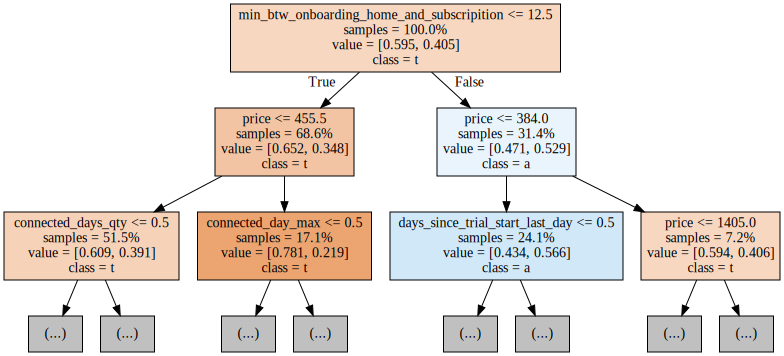

In [11]:
file_output_name = 'decision_tree_graph_2'
print('If you can not see the graph, check the file: ' + file_output_name)
print_tree_graph(file_output_name)
#value=[0,1]

In [12]:
'''
The feature without noises have the same meaning. That is curious. Even the test roc decreases.
That means 45% of users who start the trial in less than 12 minutes do not adopt. I need more information like, if it exists
a cancellation process, cancellation date and time, or cancellation feedback could provide good insights.
'''

'\nThe feature without noises have the same meaning. That is curious. Even the test roc decreases.\nThat means 45% of users who start the trial in less than 12 minutes do not adopt. I need more information like, if it exists\na cancellation process, cancellation date and time, or cancellation feedback could provide good insights.\n'

In [13]:
#Insight qty of connections
'''
Some users has less probability of adoption if they were connected just the first day. Maybe some push notifications could 
help in these cases checking it by an A/B test.
'''

'\nSome users has less probability of adoption if they were connected just the first day. Maybe some push notifications could \nhelp in these cases checking it by an A/B test.\n'